# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
# Import the libraries you'll need here.
import pandas as pd
import numpy as np
# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns
# This command tells python to use seaborn for its styling.
sns.set()

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

# Provides z-score helper function
import scipy.stats as stats


# Ignore this, this is just for displaying images.
from IPython.display import Image


# Load the csv file into a pandas dataframe.


In [2]:
# Load the csv file into a pandas dataframe.

df_cars = pd.read_csv('data\cars.csv', sep=',')
df_iris = pd.read_csv('data\iris.csv', sep =',')


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.
print('cars.csv have',df_cars.duplicated().sum(), 'duplicate')

cars.csv have 720 duplicate


In [4]:
print('iris.csv have',df_iris.duplicated().sum(), 'duplicate')

iris.csv have 5 duplicate


In [5]:
#  2. Modify our df to have all duplicate rows removed. 

car_nodups=df_cars.duplicated()== False
df_cars_nodups=df_cars[car_nodups]
#df_cars_nodups

In [6]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
car_dups=df_cars.duplicated()== True
df_cars_dups = df_cars [car_dups]
#df_cars_dups

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [7]:
# * Which column has the most null values and how many null values does it have?

df_null=df_cars.isnull().sum()
df_null[4:5]

Engine HP    69
dtype: int64

In [8]:
# * Print how long (aka how many rows) our dataframe is.
total_rows = df_cars.shape[0]
total_rows

11914

In [9]:
# * Remove any row that has a null value in it. 
df_cars_nonull = df_cars.dropna()

In [10]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
df_cars_nonull



,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


### Make a bar chart that displays how many time each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

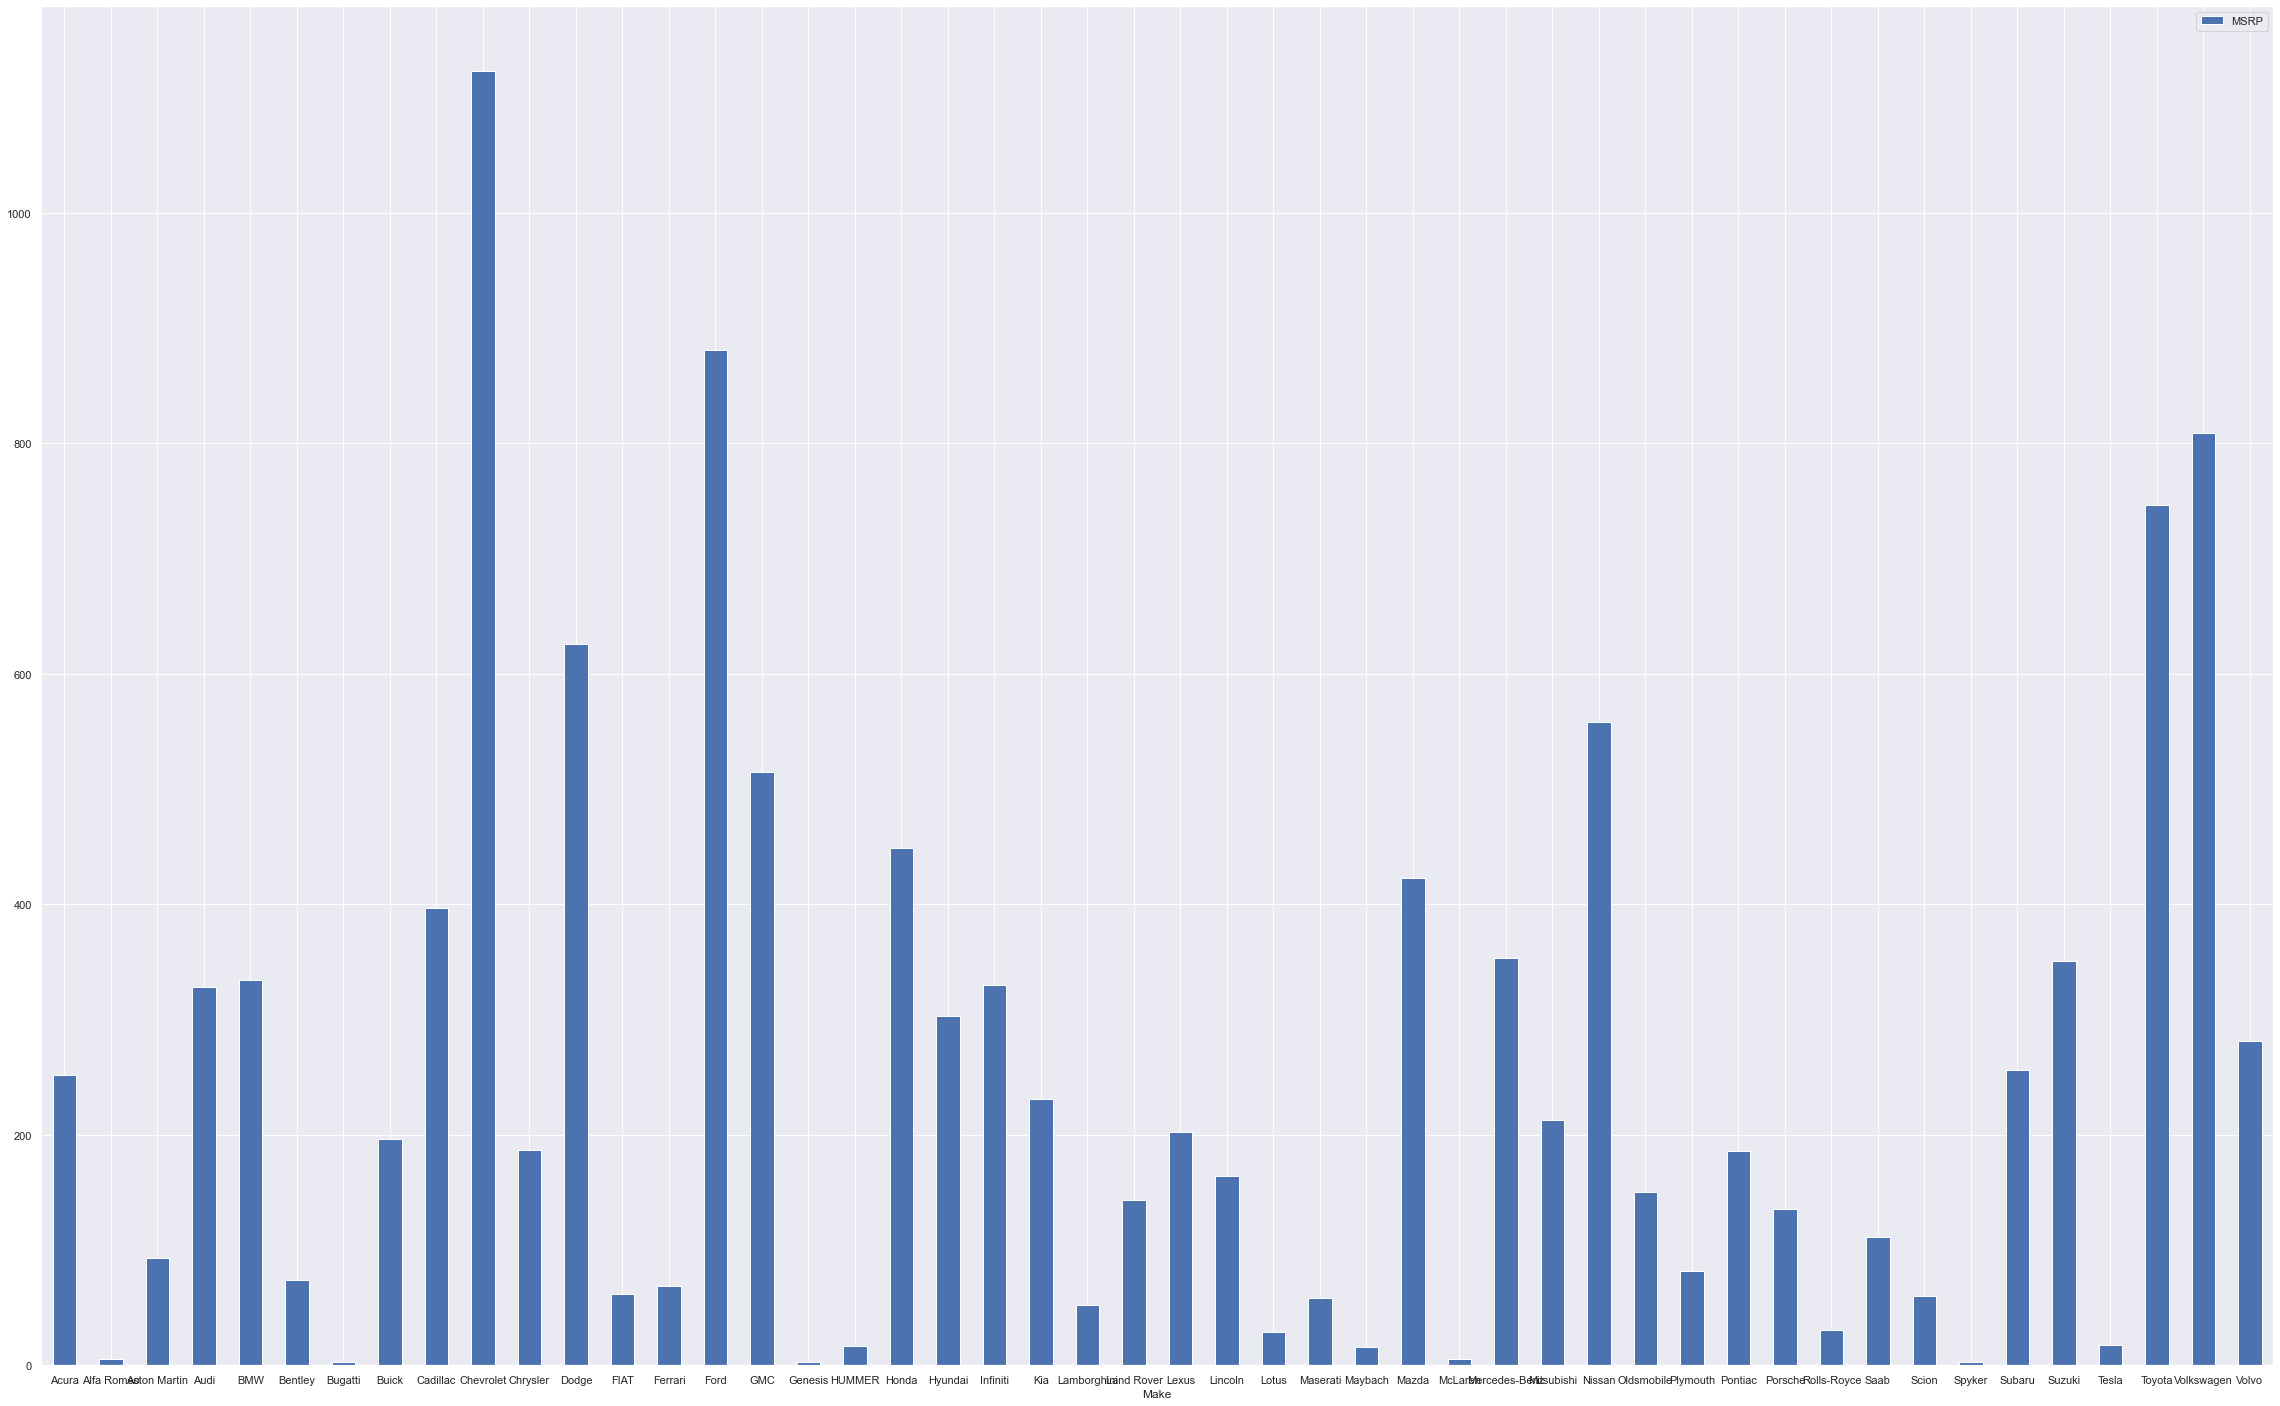

In [11]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
#df.plot(kind='scatter', x='COLUMN_NAME', y='COLUMN_NAME')
df_maker=df_cars.groupby('Make').count()
df_maker.plot.bar(y='MSRP', rot=0,figsize=(40,25))


# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

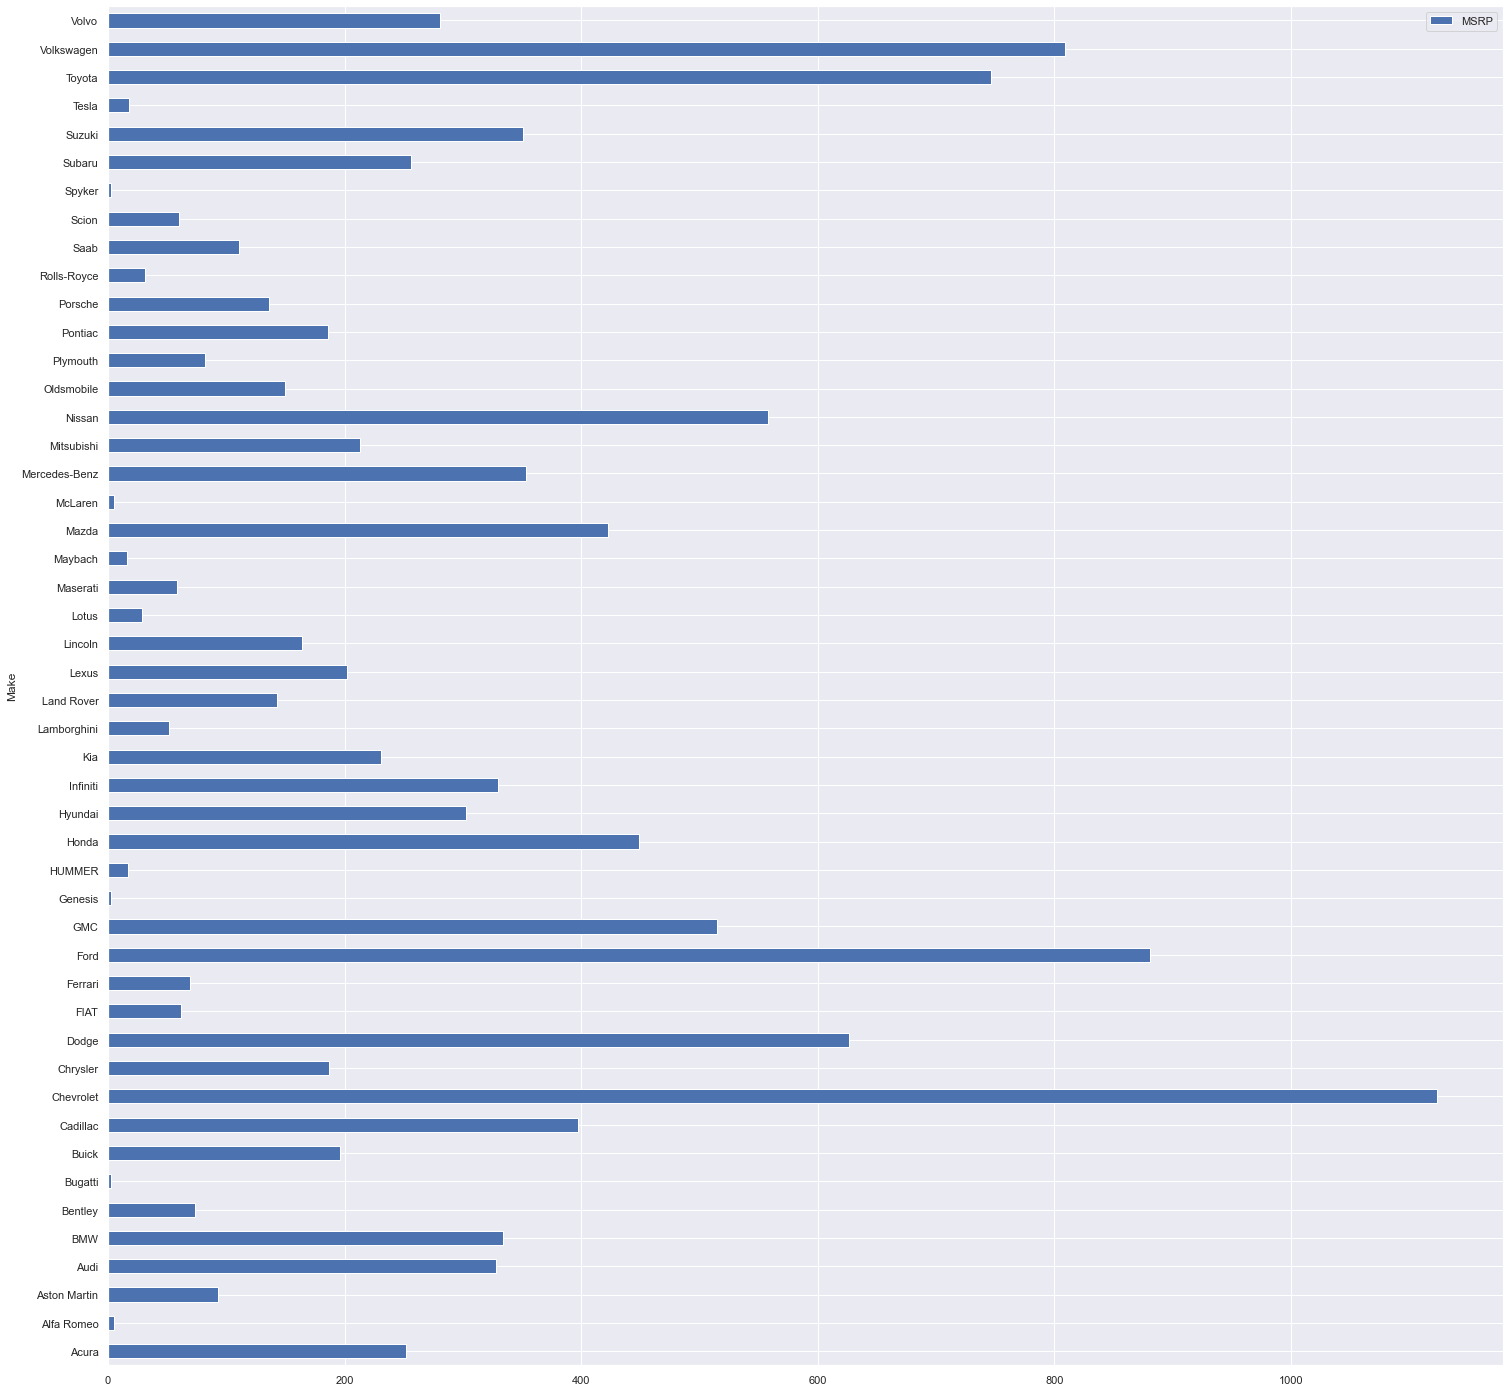

In [12]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

df_maker.plot.barh(y='MSRP', rot=0,figsize=(25,25))


# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


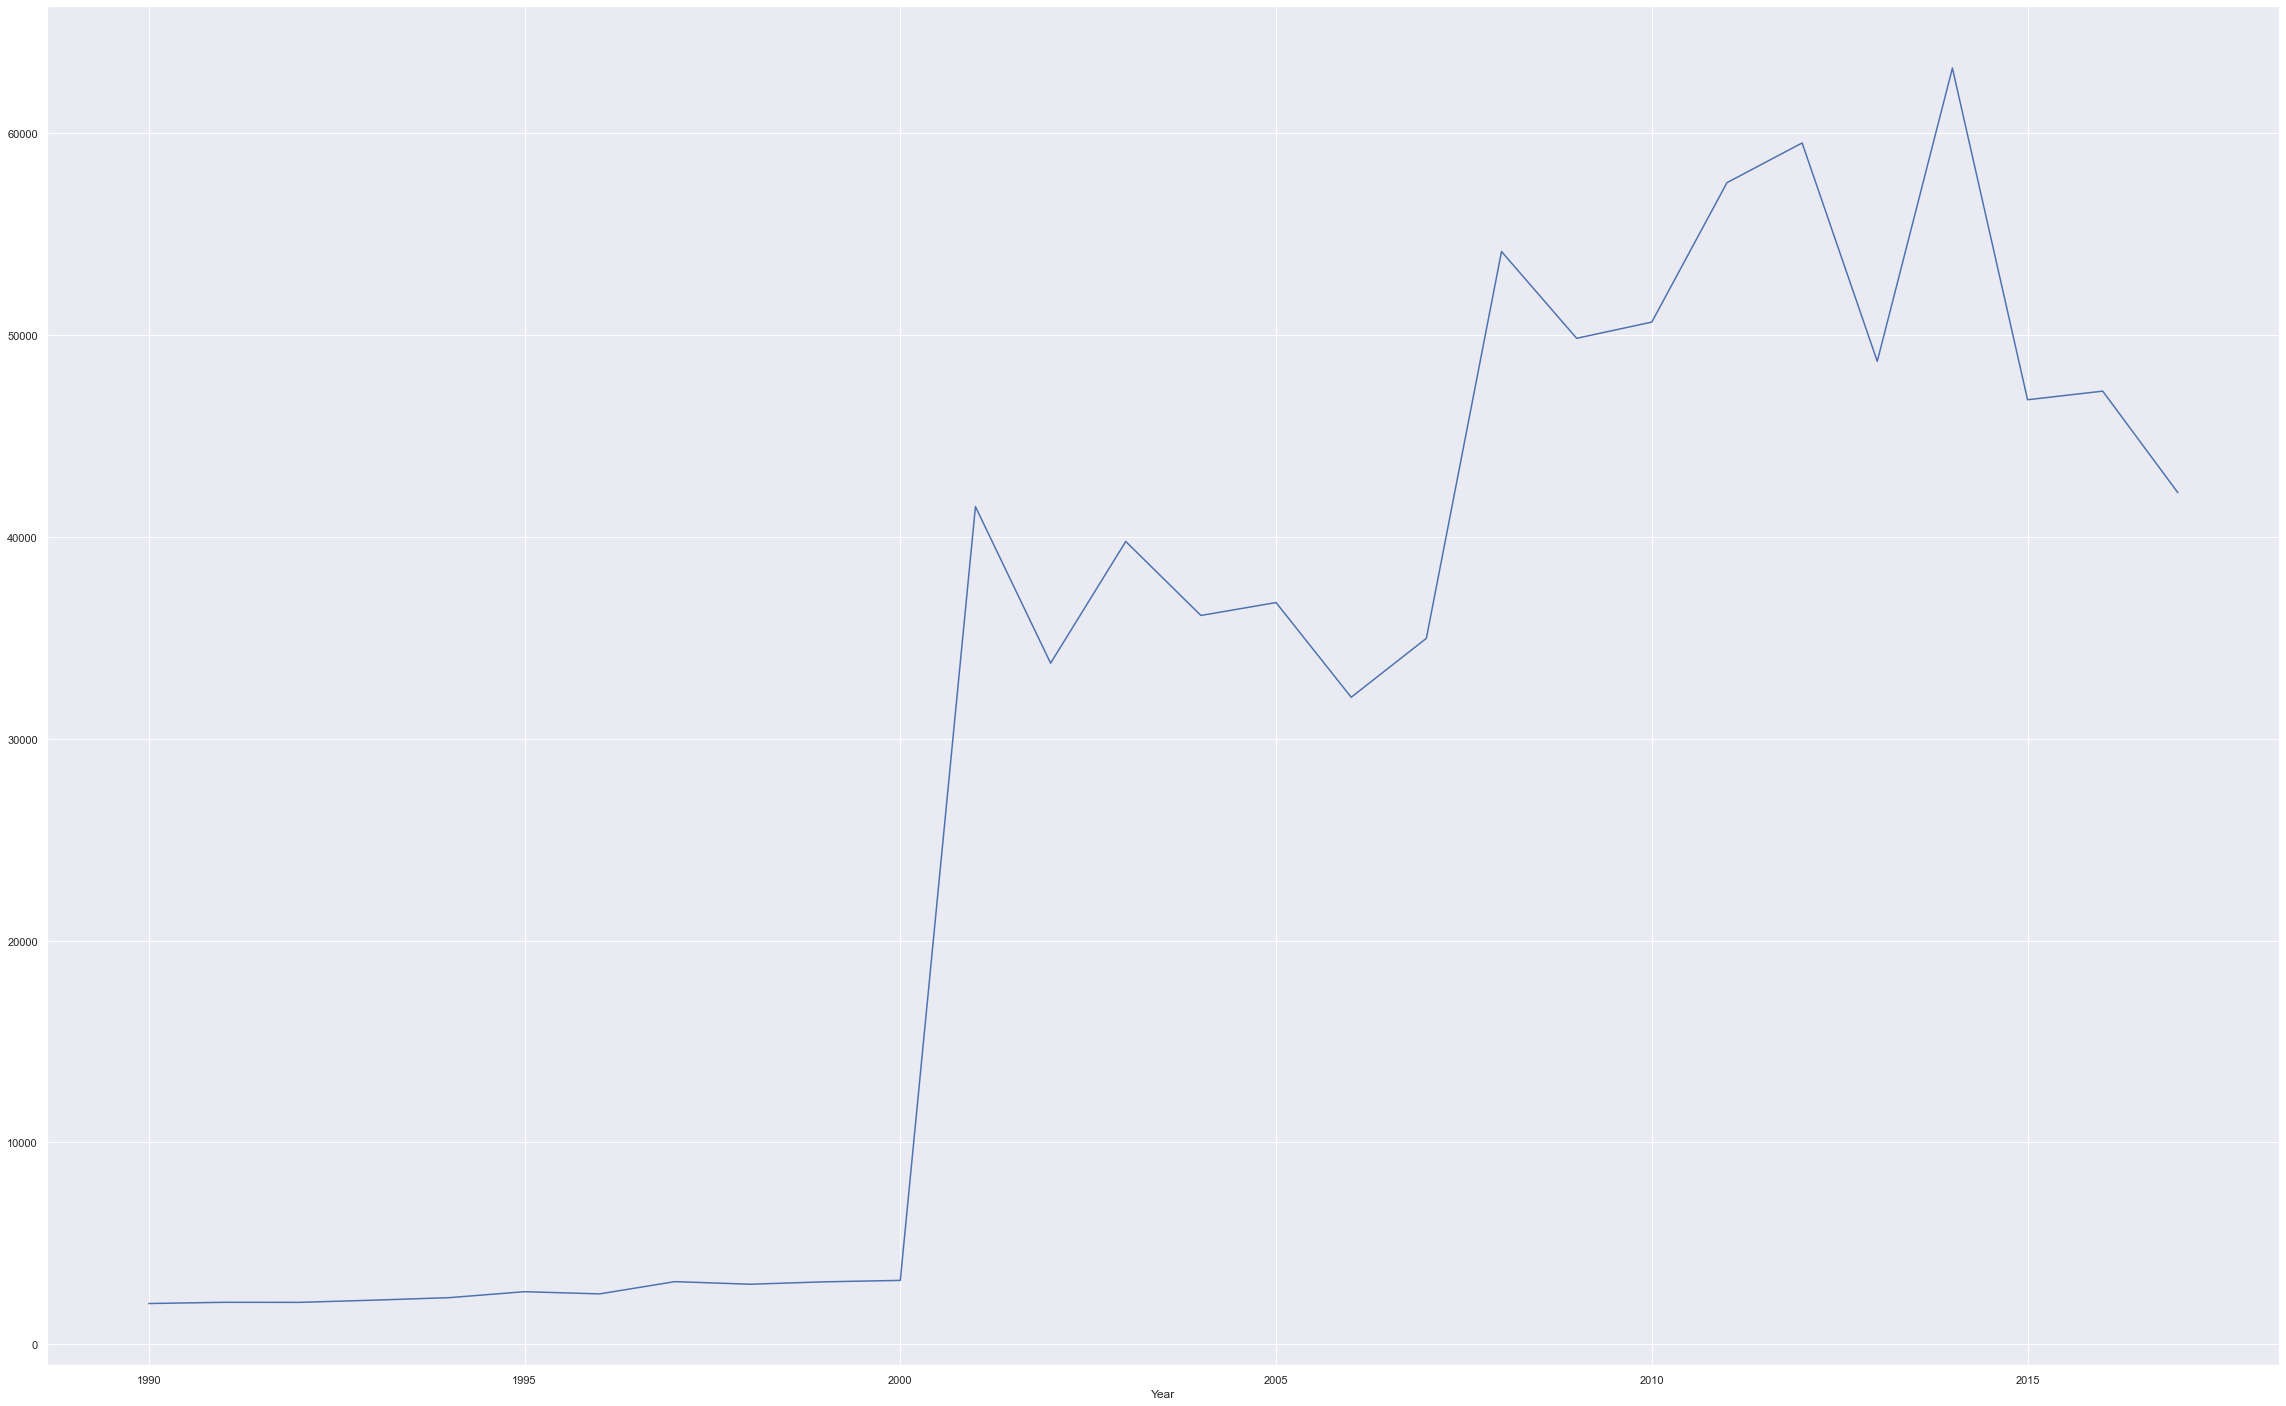

In [11]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
df_msrp=df_cars.groupby('Year')['MSRP'].mean()
graph_1=df_msrp.plot(x='Year',y='MSRP',kind='line',figsize=(40,25))
graph_1

# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.

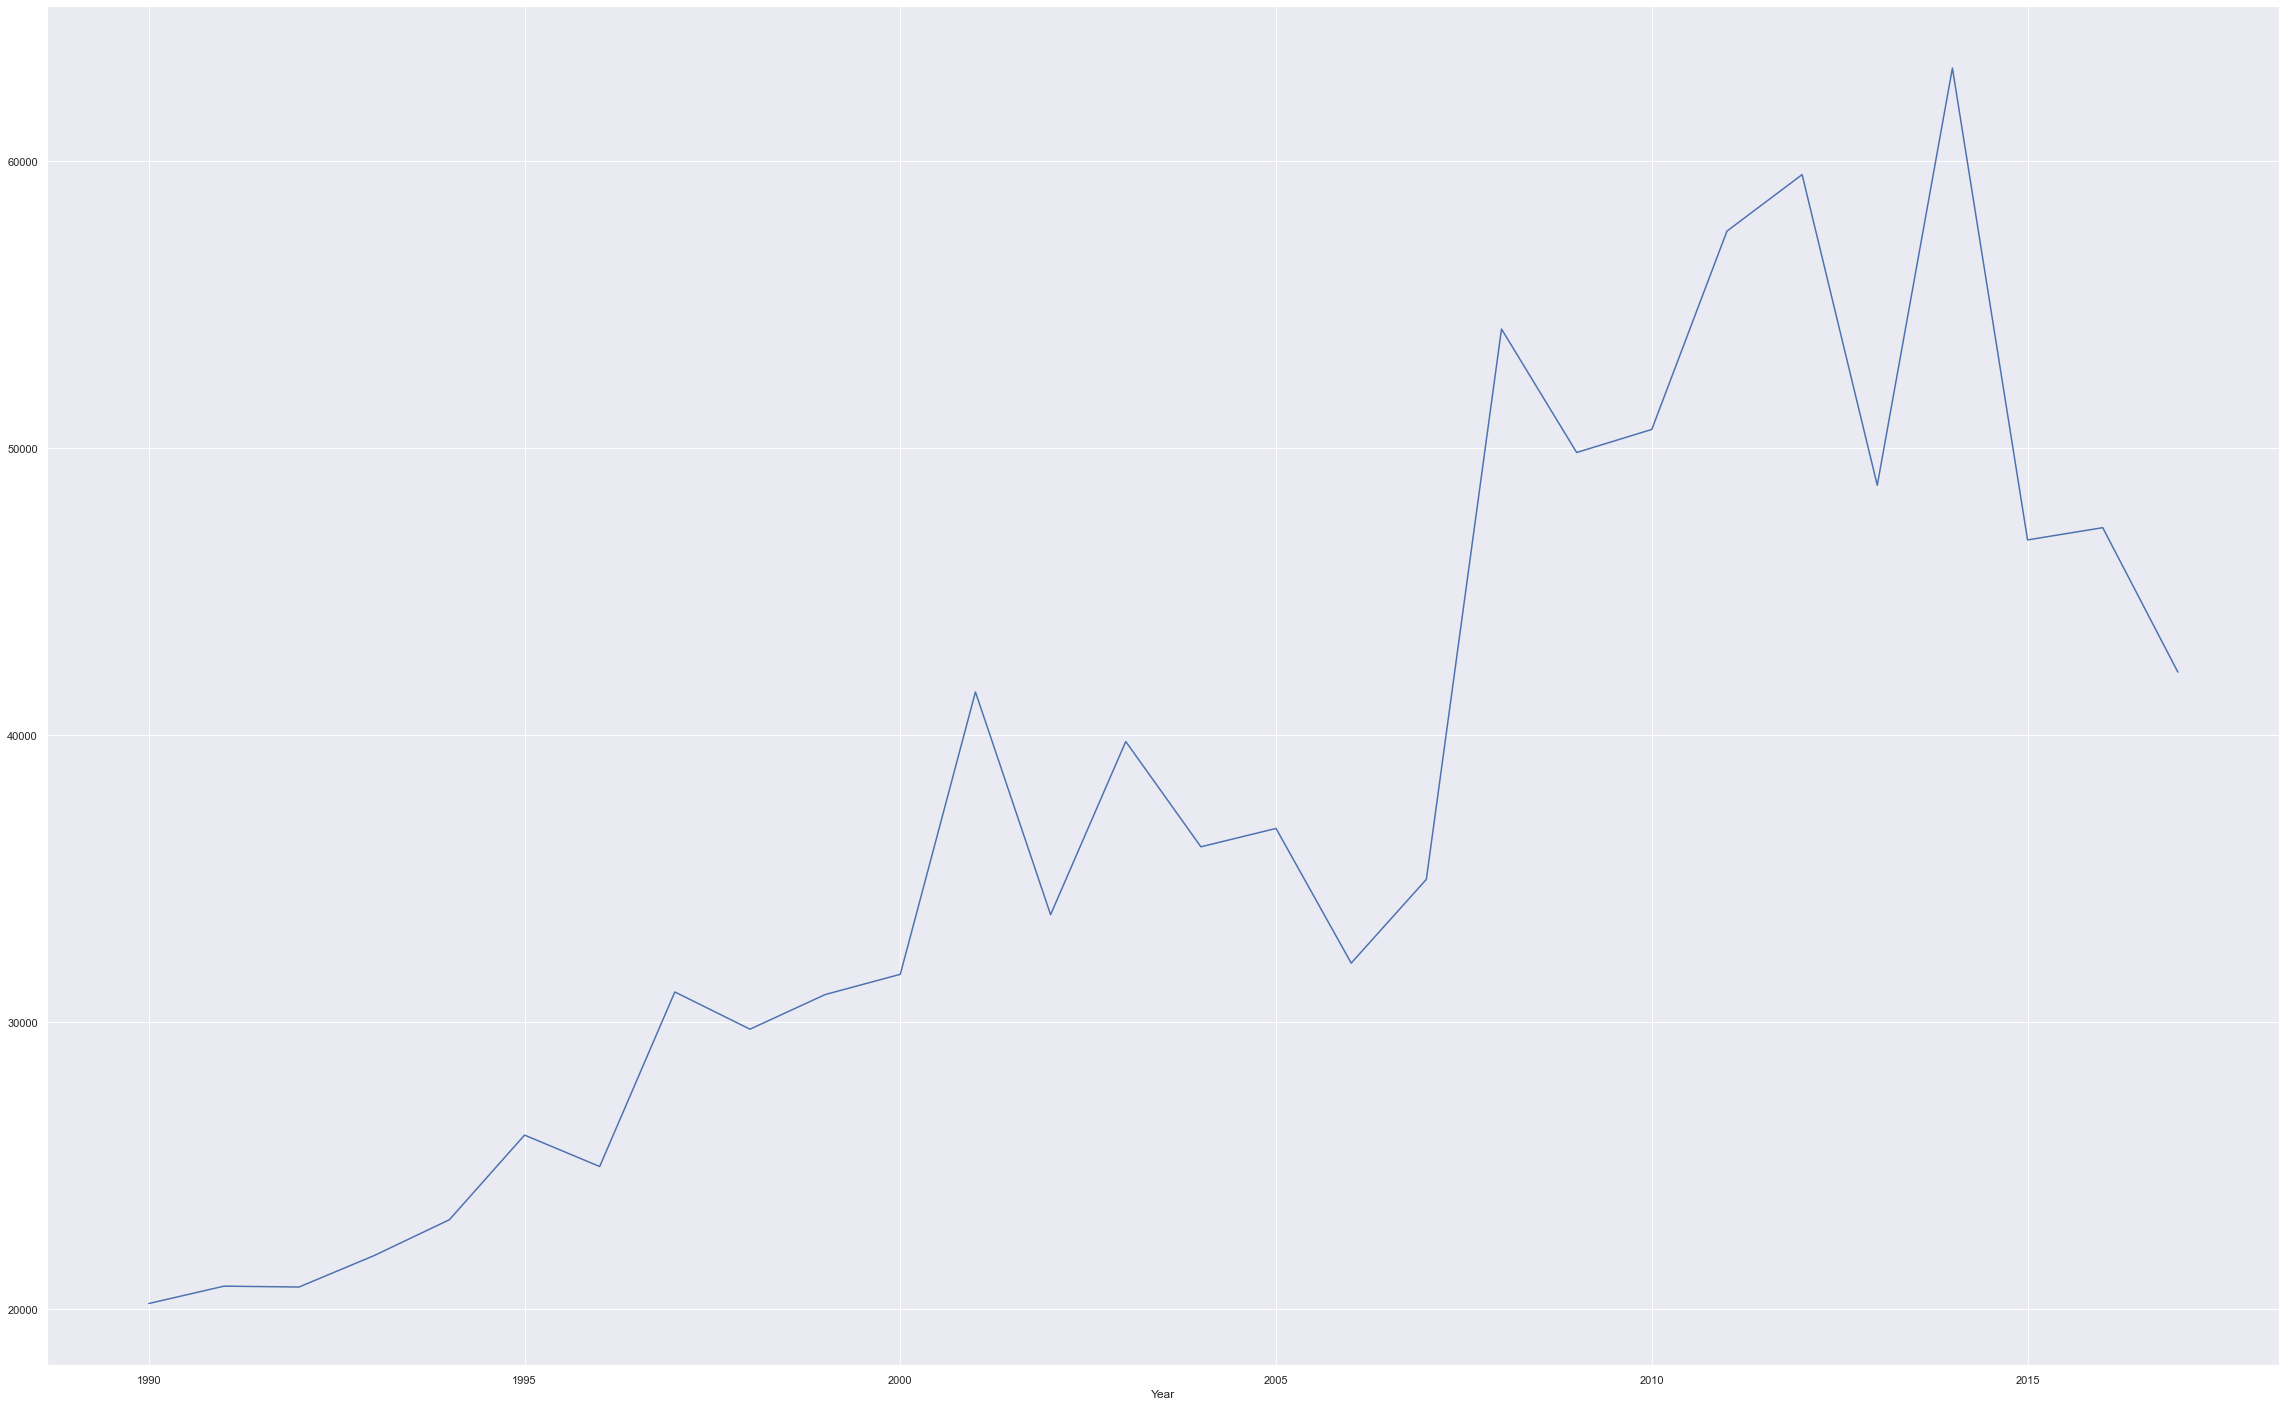

In [7]:
# Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.

c1 = df_cars['Year'] < 2001
df_cars['adjusted_price'] = np.where(c1, df_cars['MSRP']*10, df_cars['MSRP'])
#df_cars[c1] to check that it worked
df_msrp=df_cars.groupby('Year')['adjusted_price'].mean()


graph_2=df_msrp.plot(x='Year',y='adjusted_price',kind='line',figsize=(40,25))
graph_2

# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

(0.0, 100000.0)

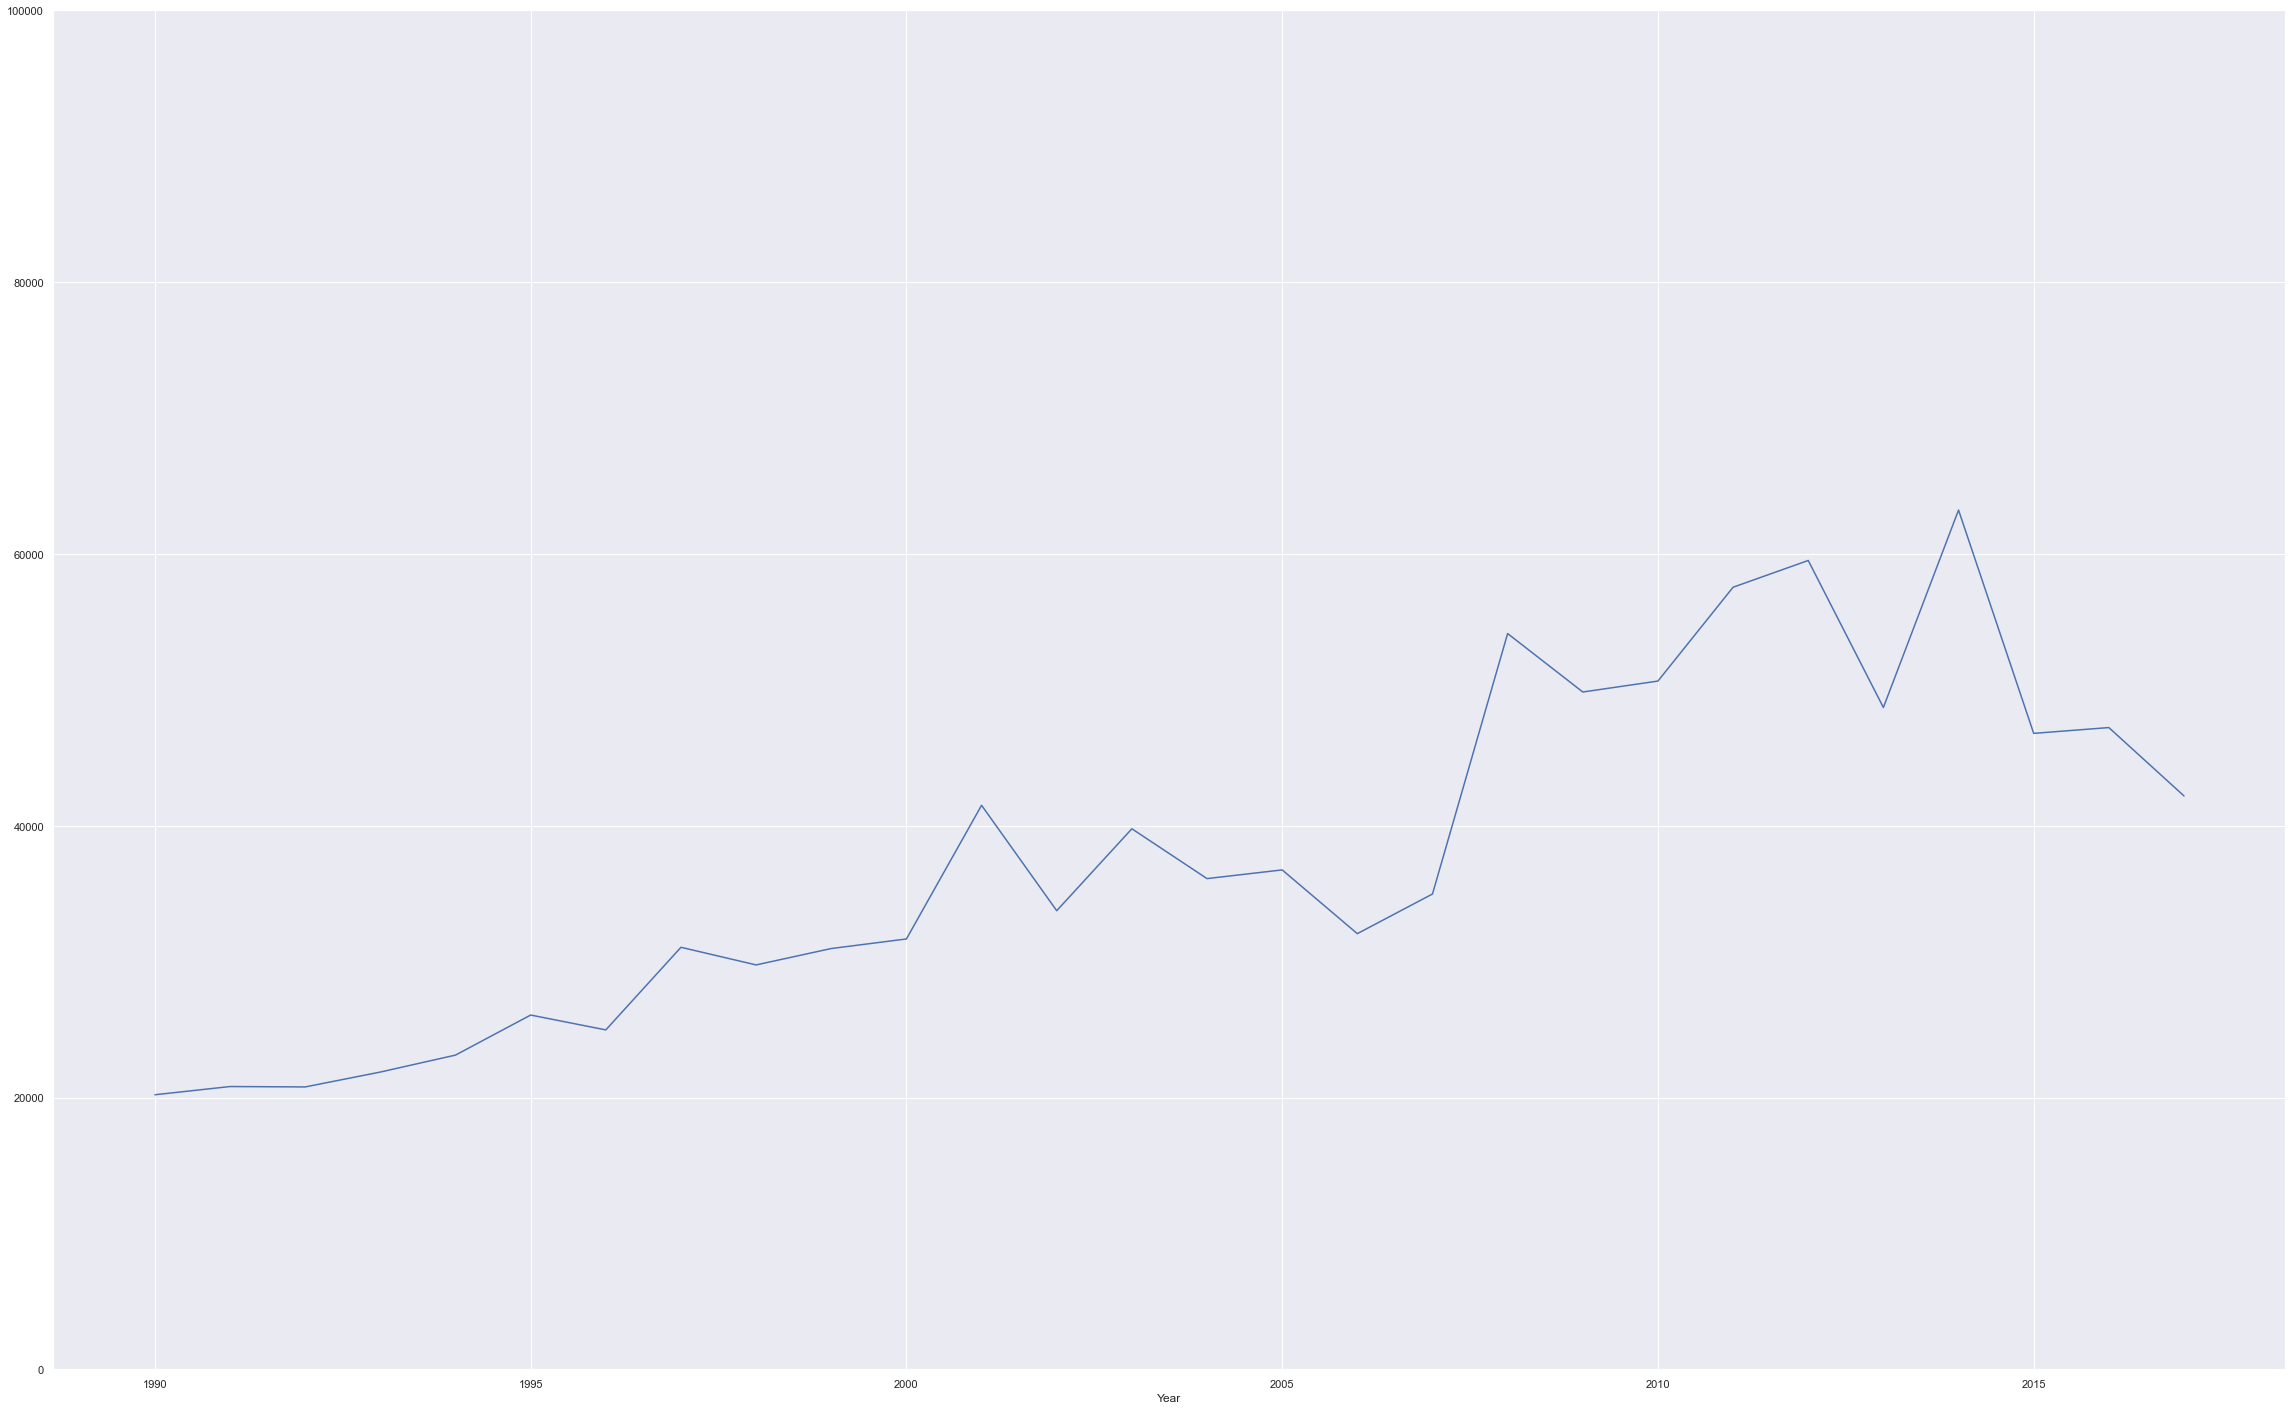

In [8]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000
graph_3=df_msrp.plot(x='Year',y='adjusted_price',kind='line',figsize=(40,25))
graph_3.set_ylim(0,100000)


# What are the top 5 car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. 
* Use our `adjusted_price` column for this

In [9]:
# What are the top 5 car makers make the most expensive cars on average. 
df_top5price=df_cars.groupby('Make')['adjusted_price'].mean()
df_sort=df_top5price.sort_values()
#df_sort.shape[0] to find the amount of rows which is 48 car maker
df_sort[43:48]

Make
Bentley        2.471693e+05
Lamborghini    3.315673e+05
Rolls-Royce    3.511306e+05
Maybach        5.462219e+05
Bugatti        1.757224e+06
Name: adjusted_price, dtype: float64

# What are the top 5 car makers that have the highest median highway MPG?

In [10]:
# Which car makers have the highest median highway MPG?
df_top5mpg=df_cars.groupby('Make')['highway MPG'].mean()
df_sort_2=df_top5mpg.sort_values()
#df_sort.shape[0] to find the amount of rows which is 48 car maker
df_sort_2[43:48]



Make
Scion         32.300000
Honda         32.574610
Alfa Romeo    34.000000
FIAT          37.338710
Tesla         98.944444
Name: highway MPG, dtype: float64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

Make
Chevrolet    AxesSubplot(0.125,0.125;0.775x0.755)
Ford         AxesSubplot(0.125,0.125;0.775x0.755)
Toyota       AxesSubplot(0.125,0.125;0.775x0.755)
Name: adjusted_price, dtype: object

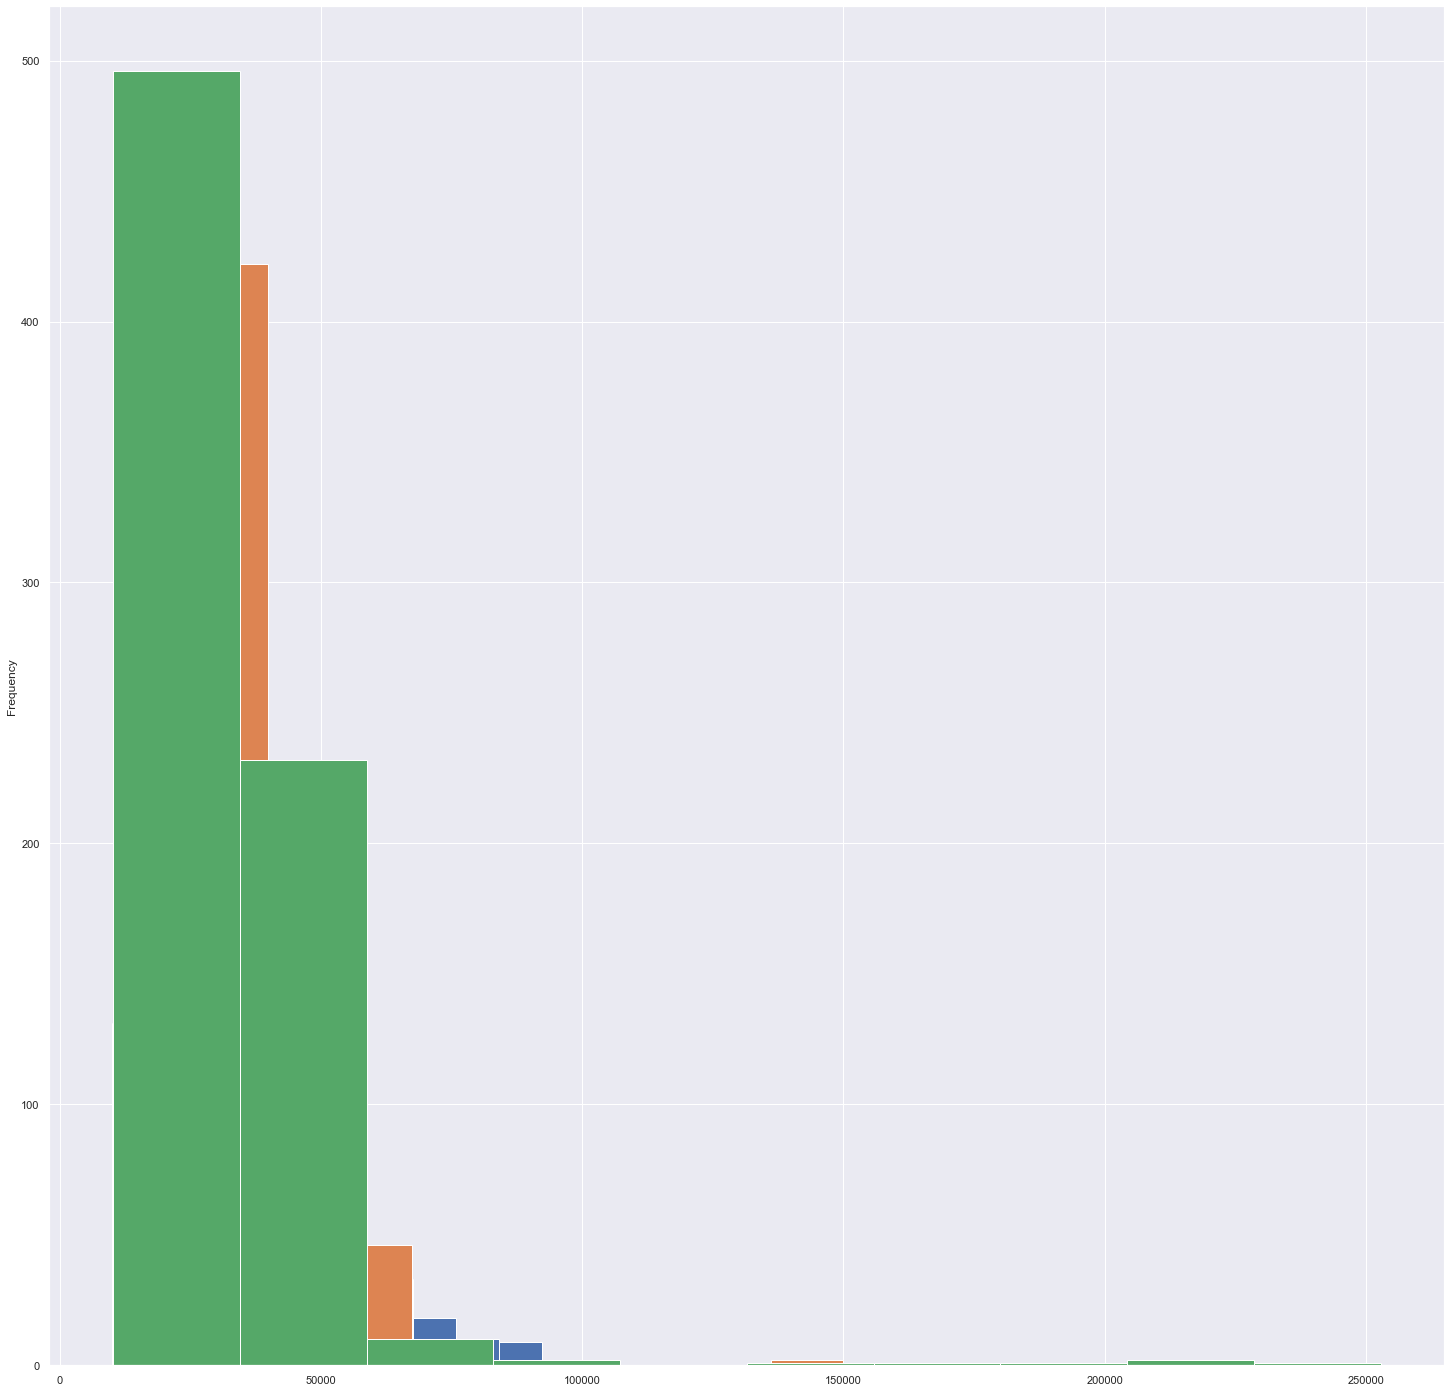

In [11]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
list_of_maker = ['Chevrolet', 'Ford', 'Toyota']
condition_maker= df_cars.Make.isin(list_of_maker)
df_CHT=df_cars[condition_maker].groupby('Make')['adjusted_price']
df_CHT.plot(kind='hist',figsize=(25,25))


# Remake the same histogram, but limit the x-axis from 0 to 100,000

In [ ]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000

df_CHT_1=df_CHT.plot(kind='hist',figsize=(25,25))
df_CHT_1.xlim(xmin=0,xmax=100000)

# Plot the relationship between Engine HP and highway MPG

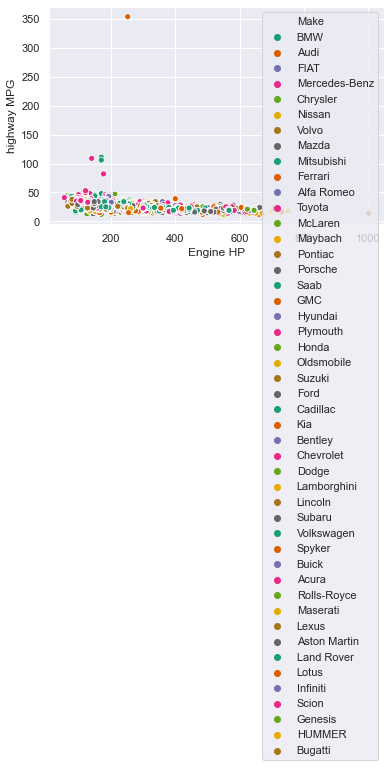

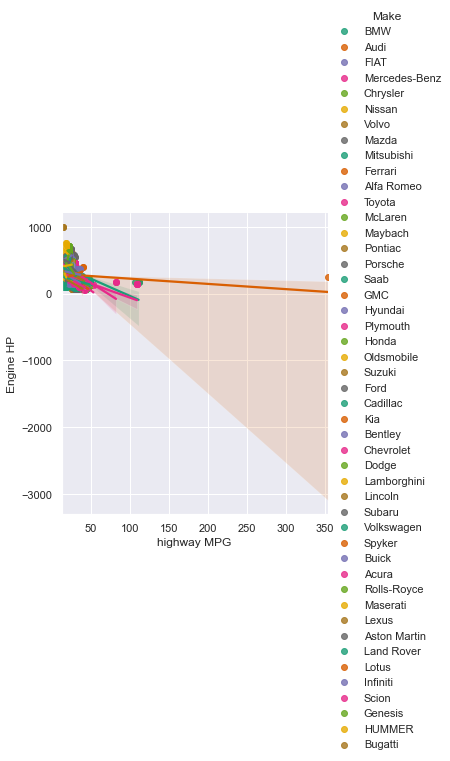

In [42]:
# Plot the relationship between Engine HP and highway MPG

import seaborn as sns
# Dont forget to call sns.set()! 
sns.set()
# Call using sns, and pass in the data frame.
#ax = sns.scatterplot(data=df_cars, x='Engine HP', y='highway MPG'hue='class');
sns.scatterplot(data=df_cars, x='Engine HP', y='highway MPG', hue='Make', palette='Dark2');
ax = sns.lmplot(data=df_cars, y='Engine HP', x='highway MPG',hue='Make'palette='Dark2');
             

# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

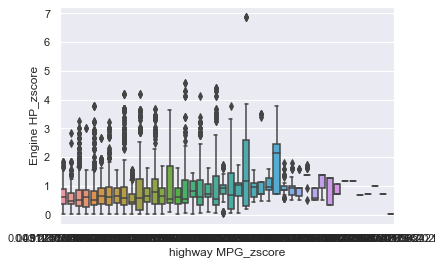

In [44]:
# Remove any statisical outliers from Engine HP and highway MPG
df_cars = df_cars.dropna()

# Create a list of just our numerical columns
numerical_cols = ['Engine HP', 'highway MPG']

# Create an empty list that we will store our new z-score column names in
z_score_cols = []

# Loop through the numerical columns
for col in numerical_cols:
    
    # Create a new column name that is the old column name + 'z_score'
    new_col_name = col + '_zscore'
    
    # Call the zscore function on the numerical column in our dataframe
    # And set it equal to our new column name.
    df_cars[new_col_name] = stats.stats.zscore(df_cars[col])
    
    # Convert all values into absolute values. 
    df_cars[new_col_name] = abs(df_cars[new_col_name])
    
    # Append the new column name our our z_score_cols list for easier access for later.
    z_score_cols.append(new_col_name)
df_cars.head()


# Make our selection mask, so anwhere the zscore is greater than 3
condition = df_cars[z_score_cols] < 3

# Say if any of the rows is true, set to true, else set to false
condition = condition.any(axis=1)

# Apply our condition mask
newdf = df_cars[condition]

# Print our results
newdf.head()
ax = sns.boxplot(data=df_cars, y='Engine HP_zscore', x='highway MPG_zscore');

# What does this plot tell you about how Engine HP affects highway MPG?

In [26]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('YOUR ANSWER HERE')

YOUR ANSWER HERE


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

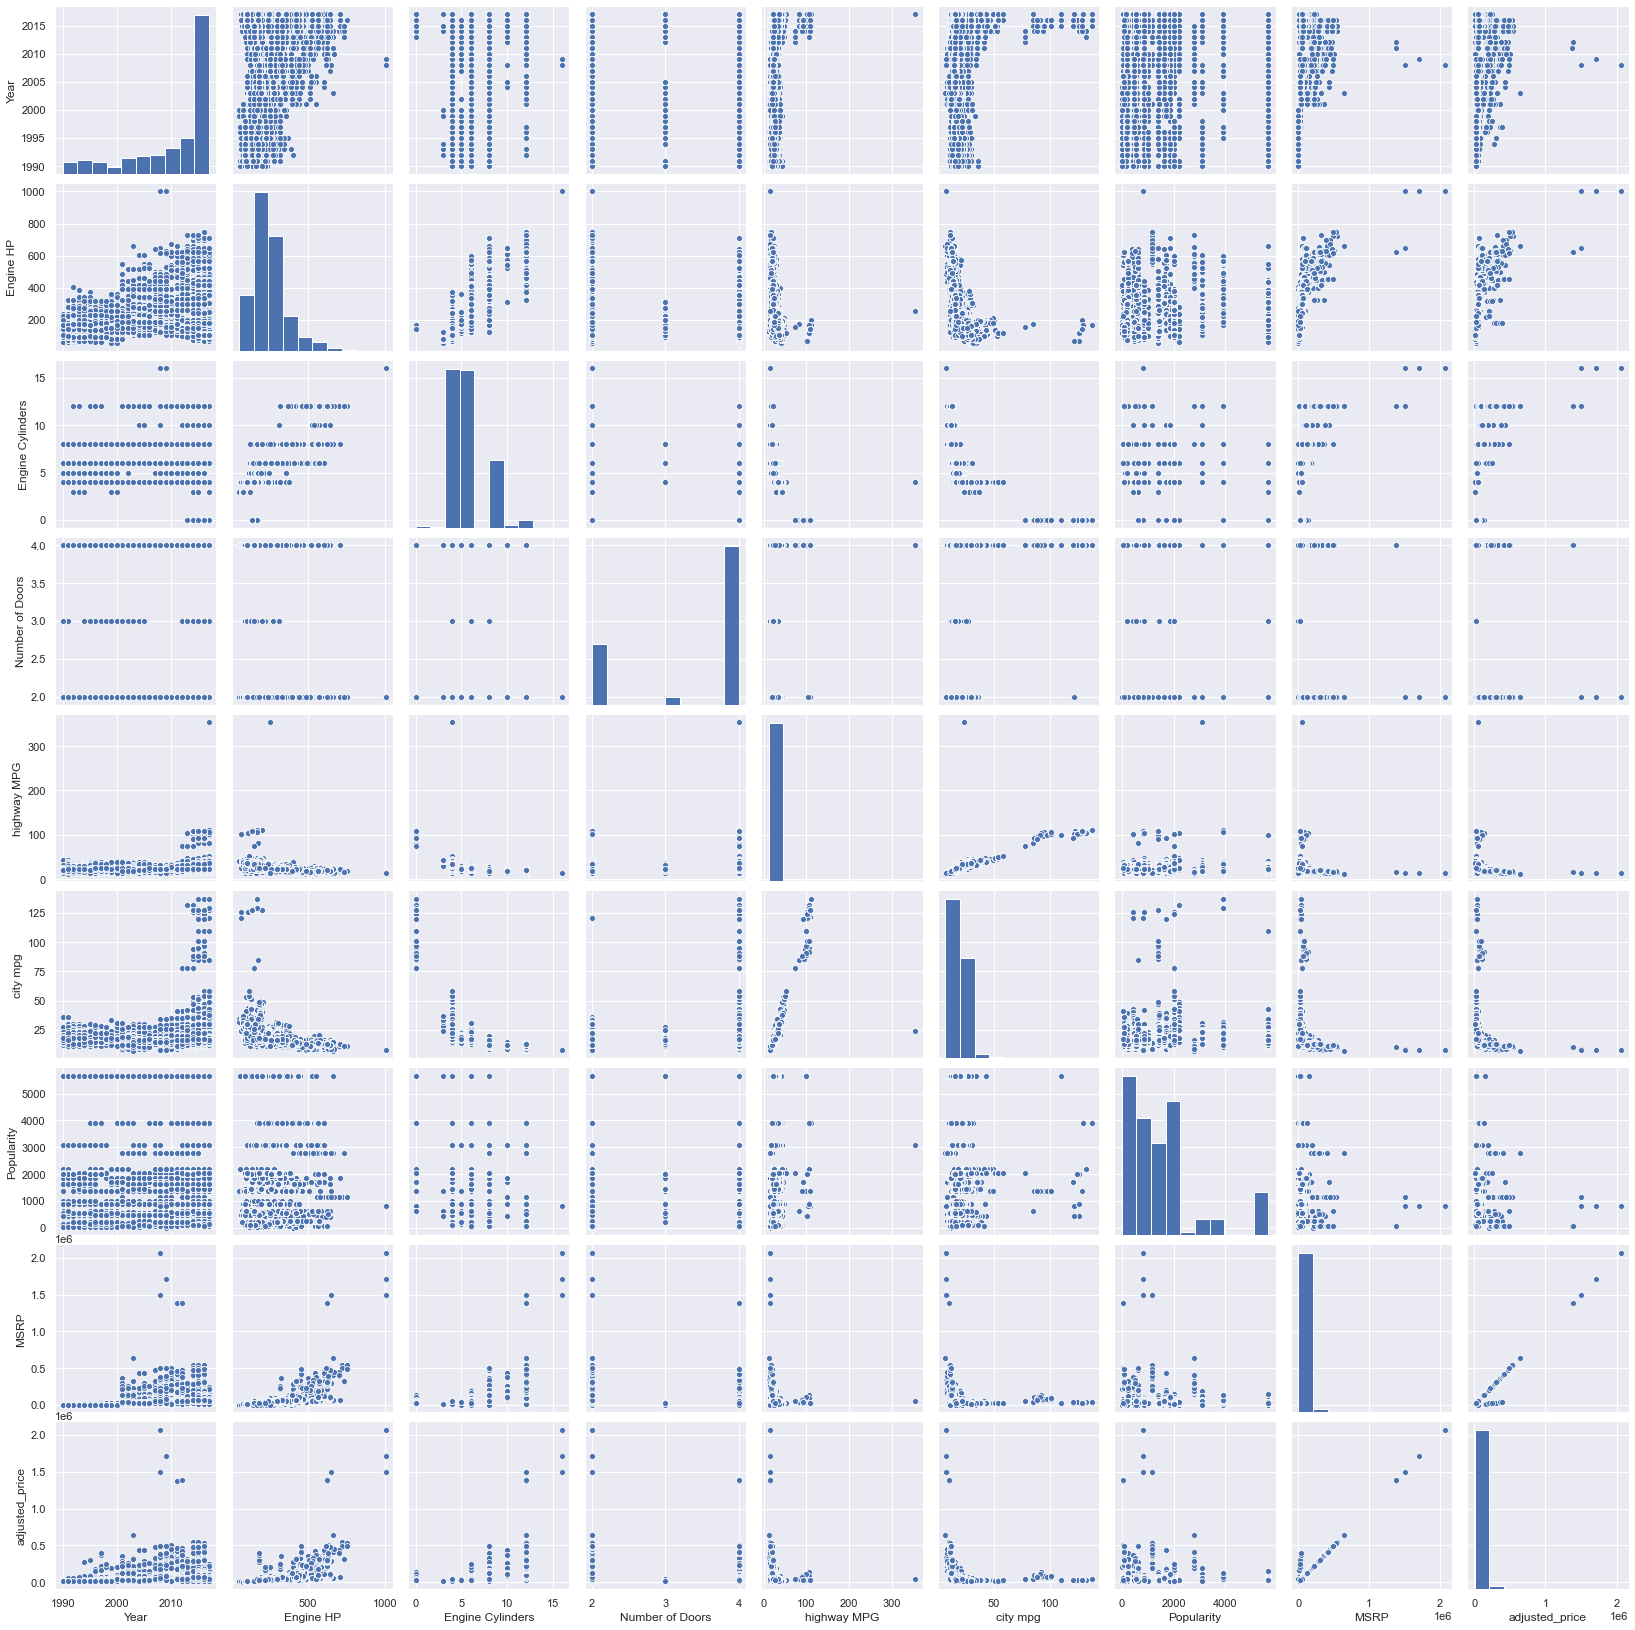

In [21]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(df_cars)


In [22]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('City mpg and highway mpg')



City mpg and highway mpg


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

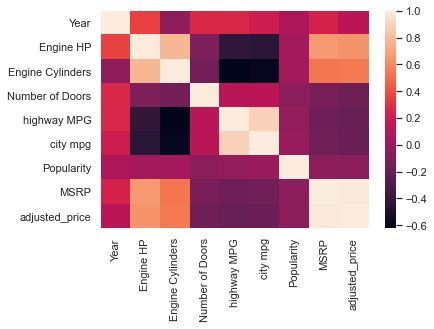

In [19]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

sns.heatmap(df_cars.corr())

# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



In [30]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well


